In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from data_preprocessing import load_data

In [5]:
df_train = load_data('Train_Data_CSV.csv')

In [7]:
def plot_distribution(df, numerical_values):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    sns.set_theme(style="whitegrid")

    for i, col in enumerate(numerical_values):
        sns.histplot(data=df, x=col, y="RUL", kde=True, ax=axes[i], hue="Dust", palette="deep", color="skyblue")
        axes[i].set_title(f'Distribution of {col} (Training Data)', fontsize=14)

    plt.tight_layout()
    plt.show()

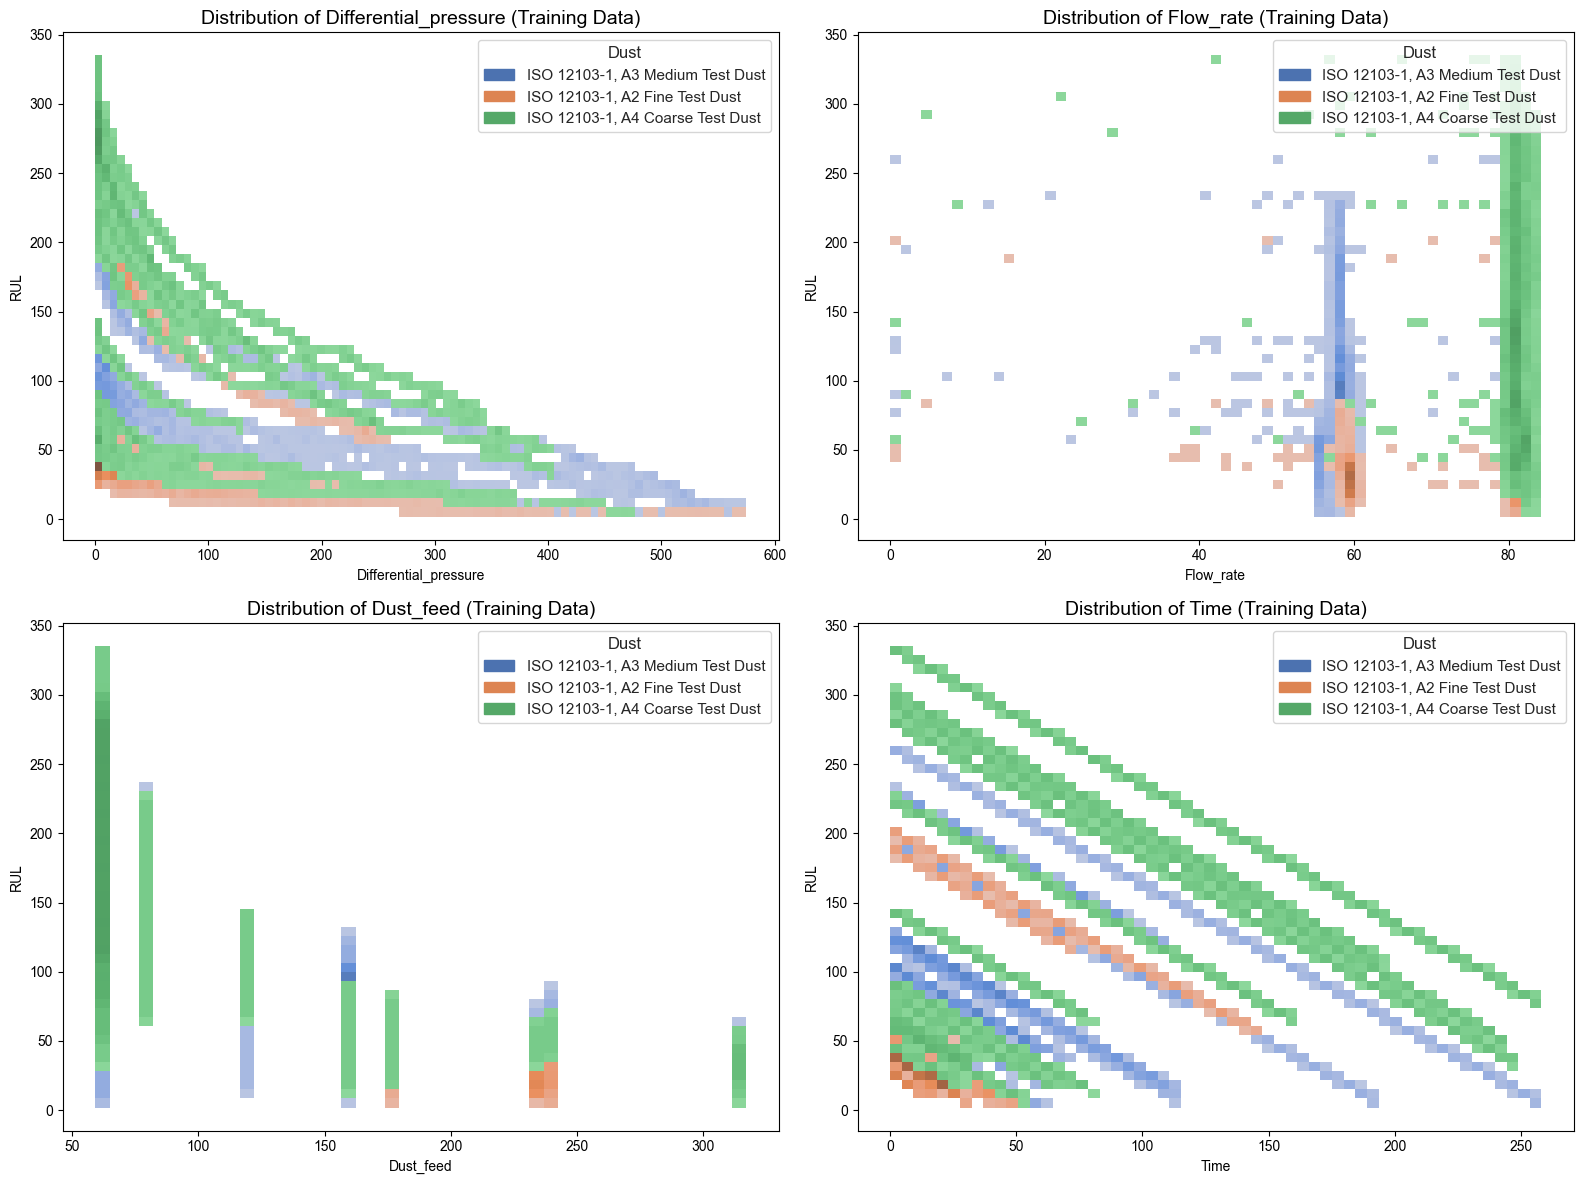

In [8]:
plot_distribution(df_train, ["Differential_pressure", "Flow_rate", "Dust_feed","Time"])


fig 1 : The graph suggests that RUL and Differential_pressure has inverse relationship as with increase in differential pressure ,RUL decreases, with different colored region indicating different dust levels.

fig 2: The spread of data points suggests that there might not be a straightforward correlation between flow rate and RUL, but dust levels could still have an influence, with a spike at 2 points.

fig 3: The discrete distribution of dust feed suggests categorical or specific levels of dust feed, and each level has a different impact on the RUL, which can be inferred from the spread and concentration of points.

fig 4:  RUL decreases linearly over time

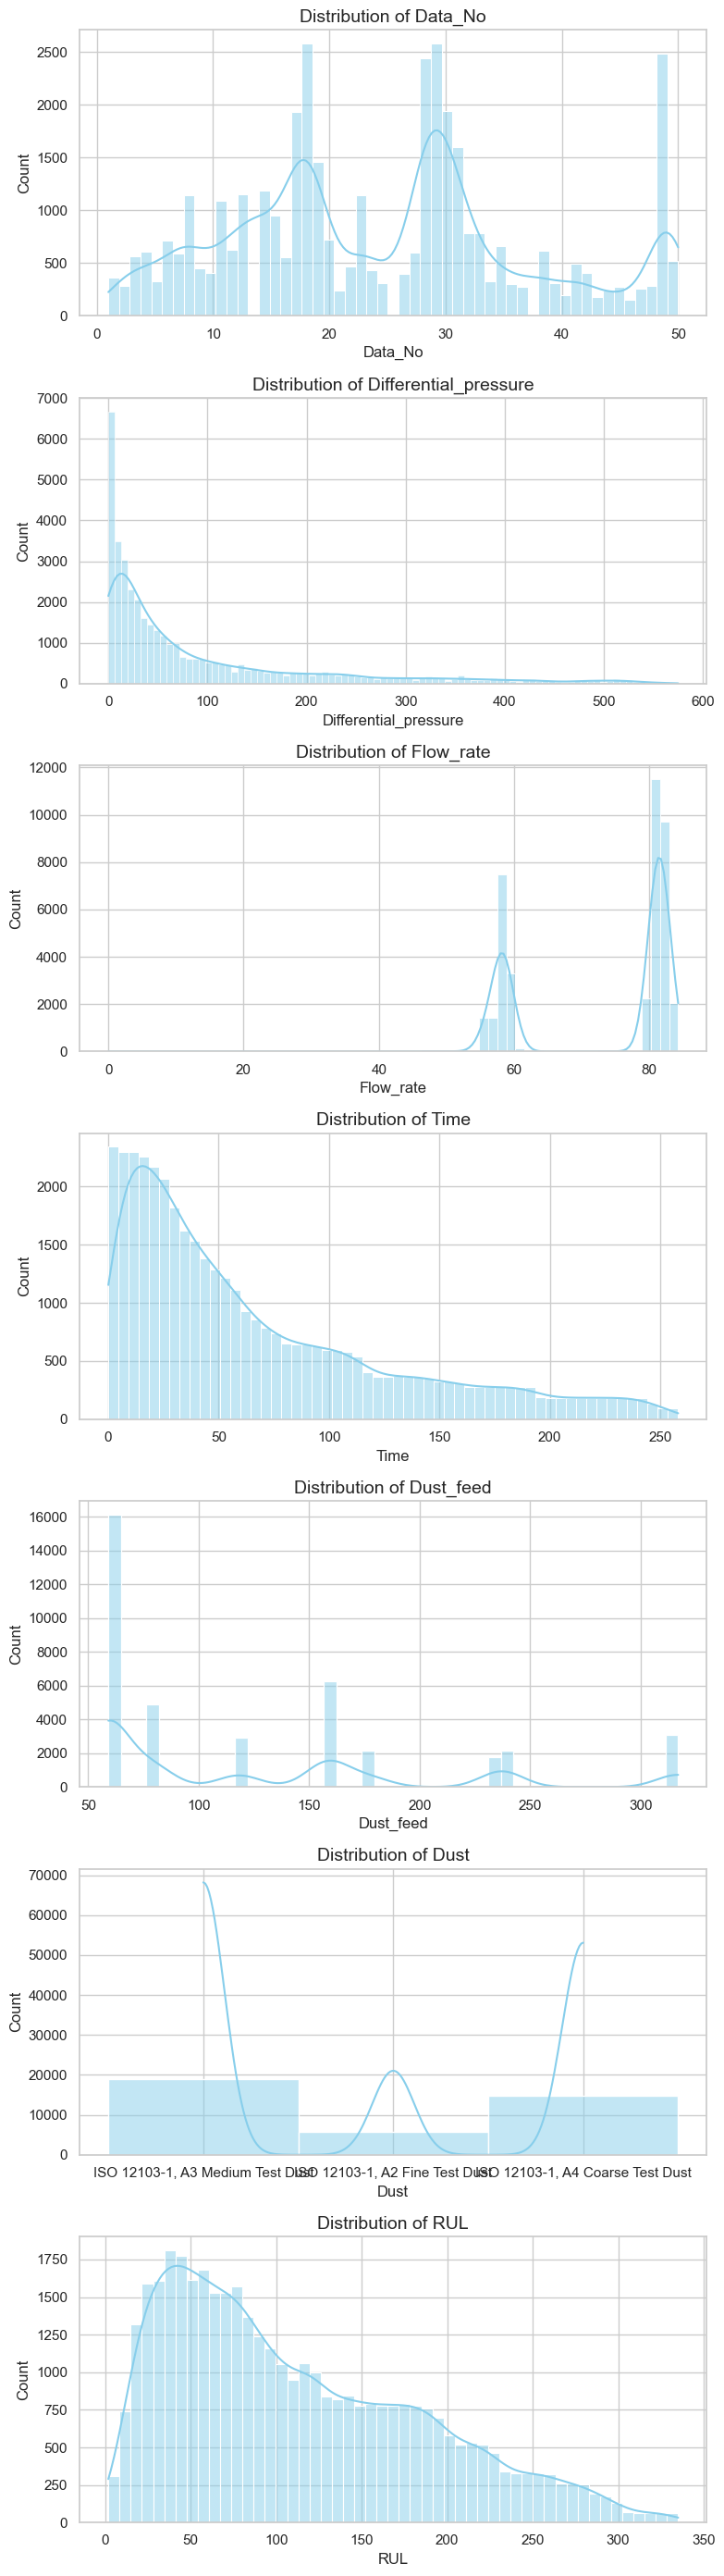

In [9]:
numerical_columns = [col for col in df_train.columns]


fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df_train, x=col, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13708\704951418.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


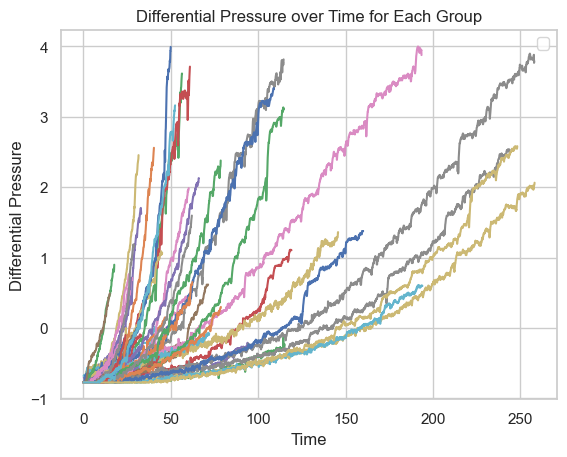

In [27]:
grouped =df_train.groupby("Data_No")
for name , group in grouped:
    plt.plot(group["Time"], group["Differential_pressure"])

plt.xlabel("Time")
plt.ylabel("Differential Pressure")
plt.title("Differential Pressure over Time for Each Group")
plt.legend()
plt.show()

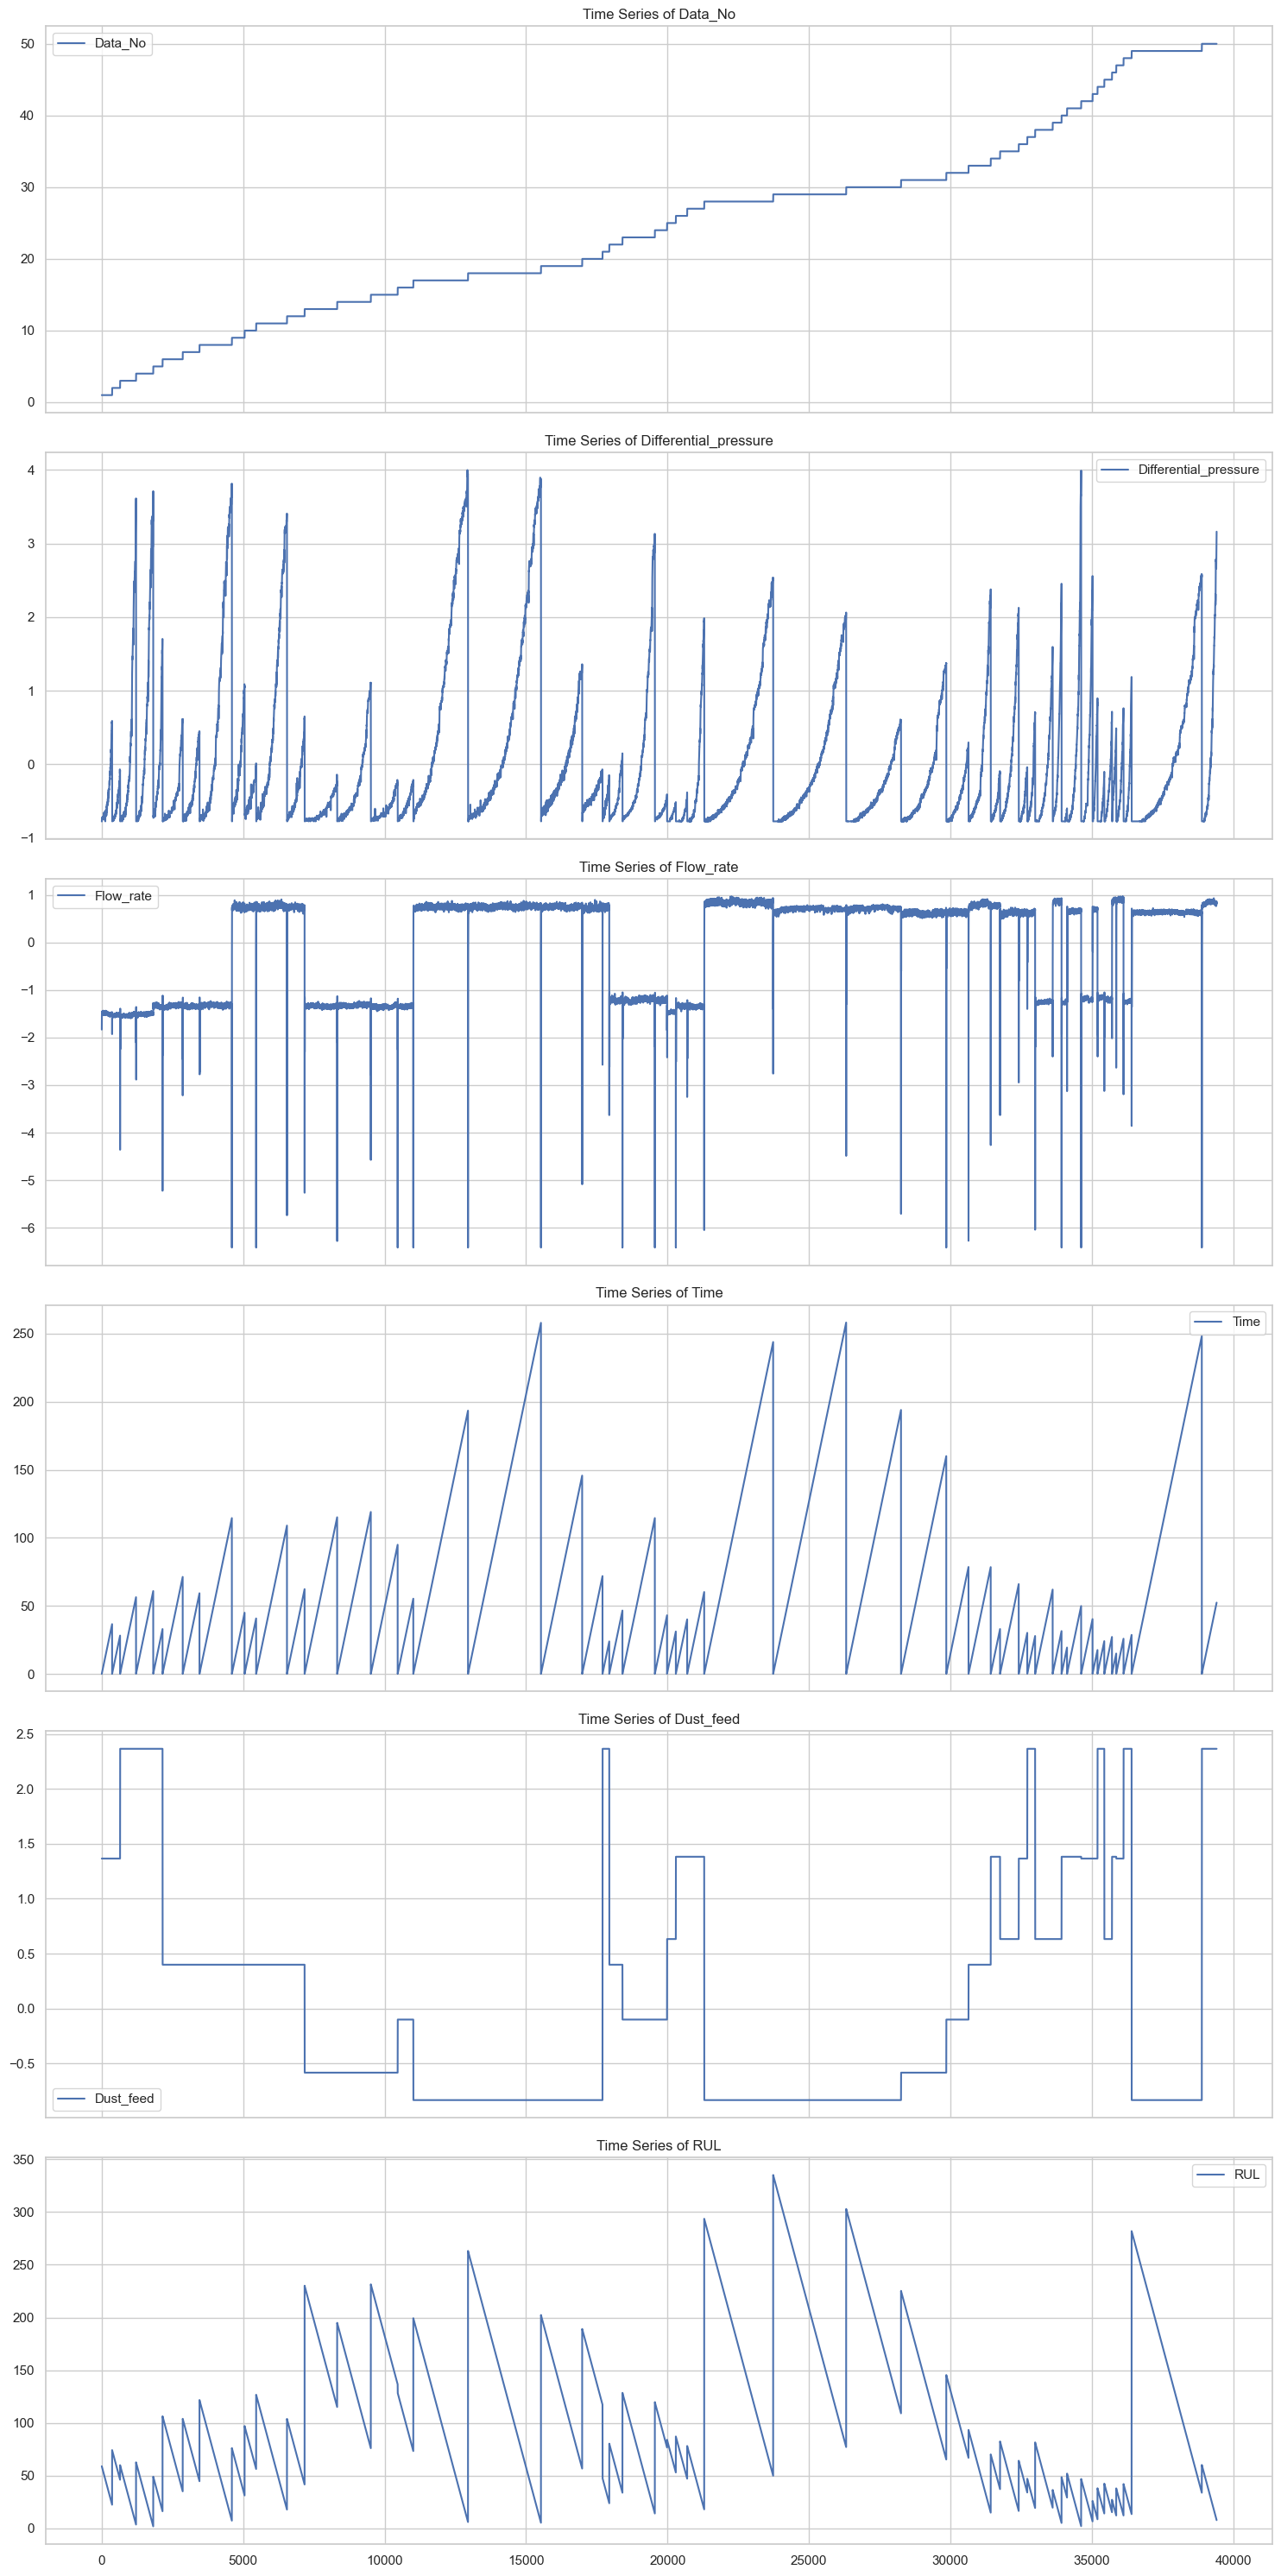

In [28]:
features = [column for column in df_train.columns if column != 'Dust']
num_features = len(features)


fig, axes = plt.subplots(num_features, 1, figsize=(15, 5 * num_features), sharex=True)

for ax, column in zip(axes, features):
    ax.plot(df_train.index, df_train[column], label=column)
    ax.set_title(f'Time Series of {column}')
    ax.legend()

plt.tight_layout()
plt.show()


<Axes: >

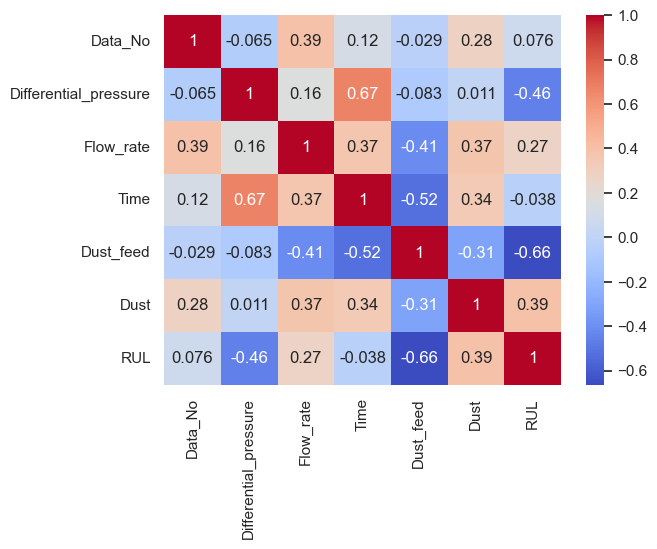

In [29]:
sns.heatmap(df_train.corr(),annot=True, cmap='coolwarm')

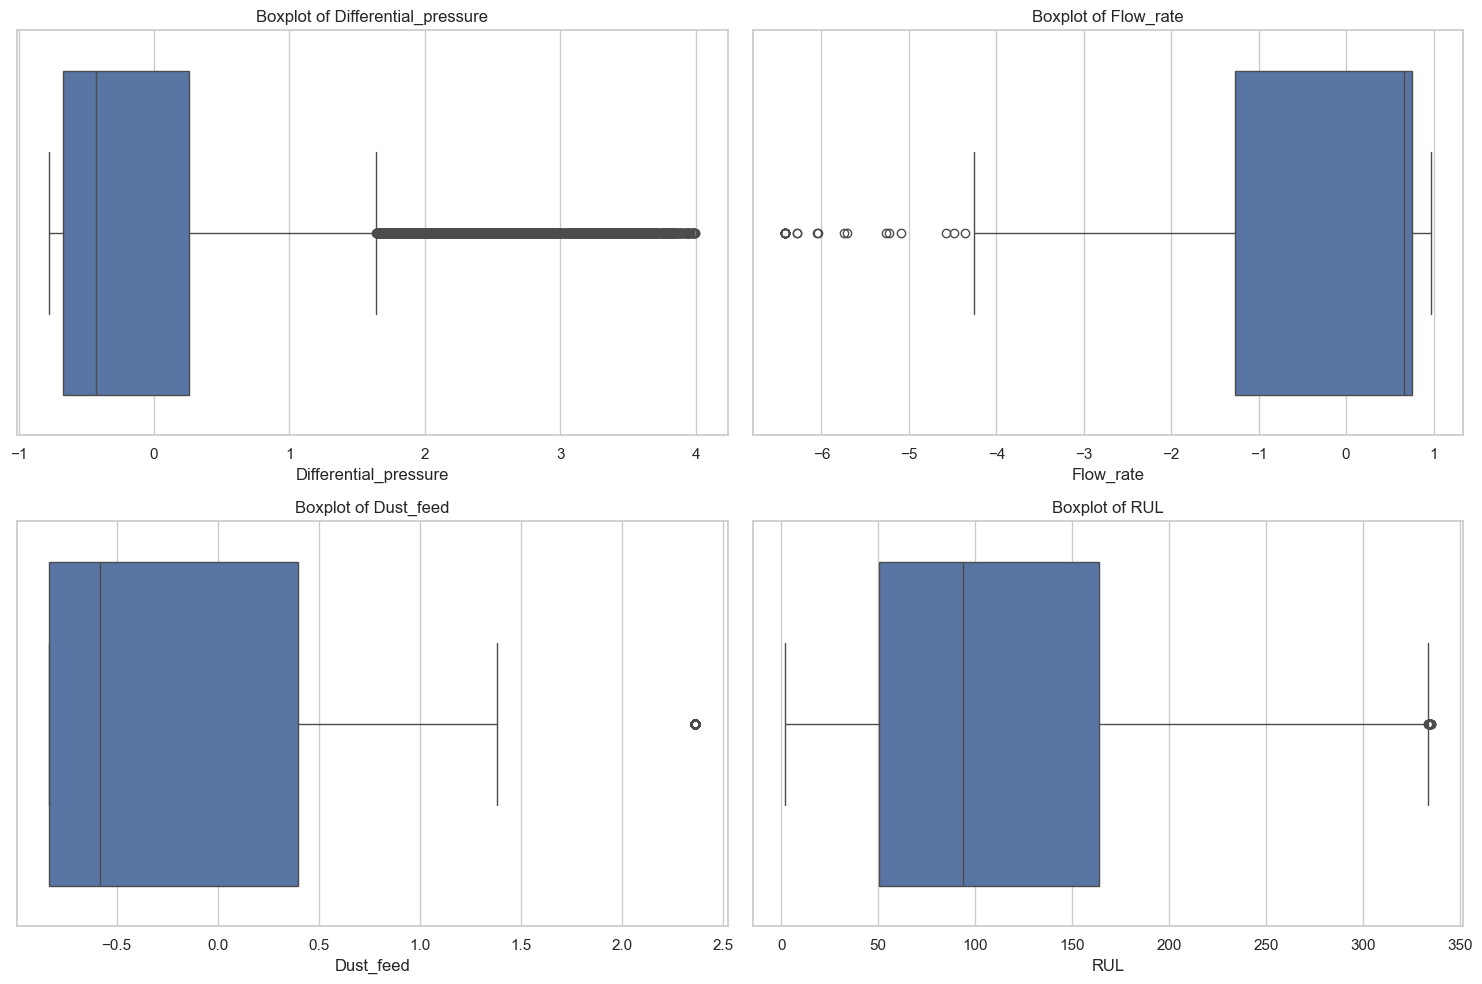

In [30]:
#Outliers check

plt.figure(figsize=(15, 10))
for i, col in enumerate(["Differential_pressure", "Flow_rate", "Dust_feed", "RUL"], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df_train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()